In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folders = ["run1", "run2", "run3"]

data = []
num_windows = []
for f in folders:
    data.append(np.load(f"data/" + f + "/data.npy"))
    num_windows.append(np.load(f"data/" + f + "/num_windows.npy"))

In [3]:
num_windows[0][4]

7

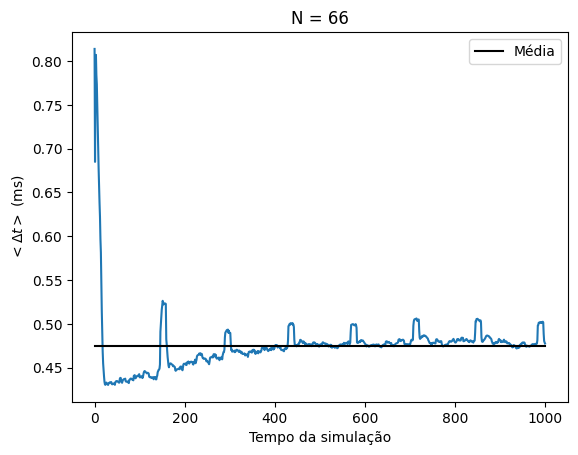

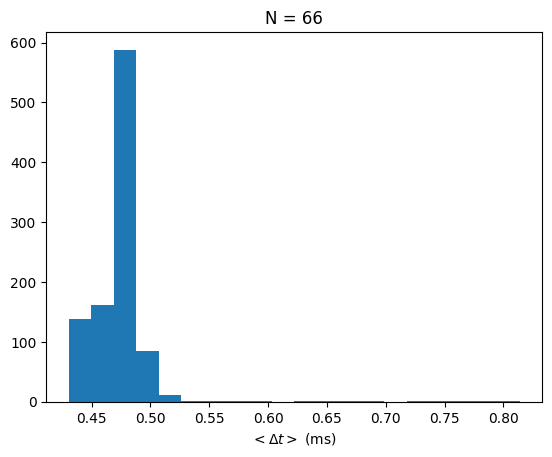

In [4]:
run_id = 2
id = -10

y_data = data[run_id][id]
num_windows_i = num_windows[run_id][id]

plt.title(f"N = {num_windows_i}")
plt.ylabel("$<\Delta t>$ (ms)")
plt.xlabel("Tempo da simulação")

plt.plot(y_data)
plt.plot([0, y_data.size],  [y_data.mean()]*2, color="black", label="Média")

plt.legend()
plt.figure()

plt.title(f"N = {num_windows_i}")
plt.xlabel("$<\Delta t>$ (ms)")

plt.hist(y_data, bins=20)

plt.show()

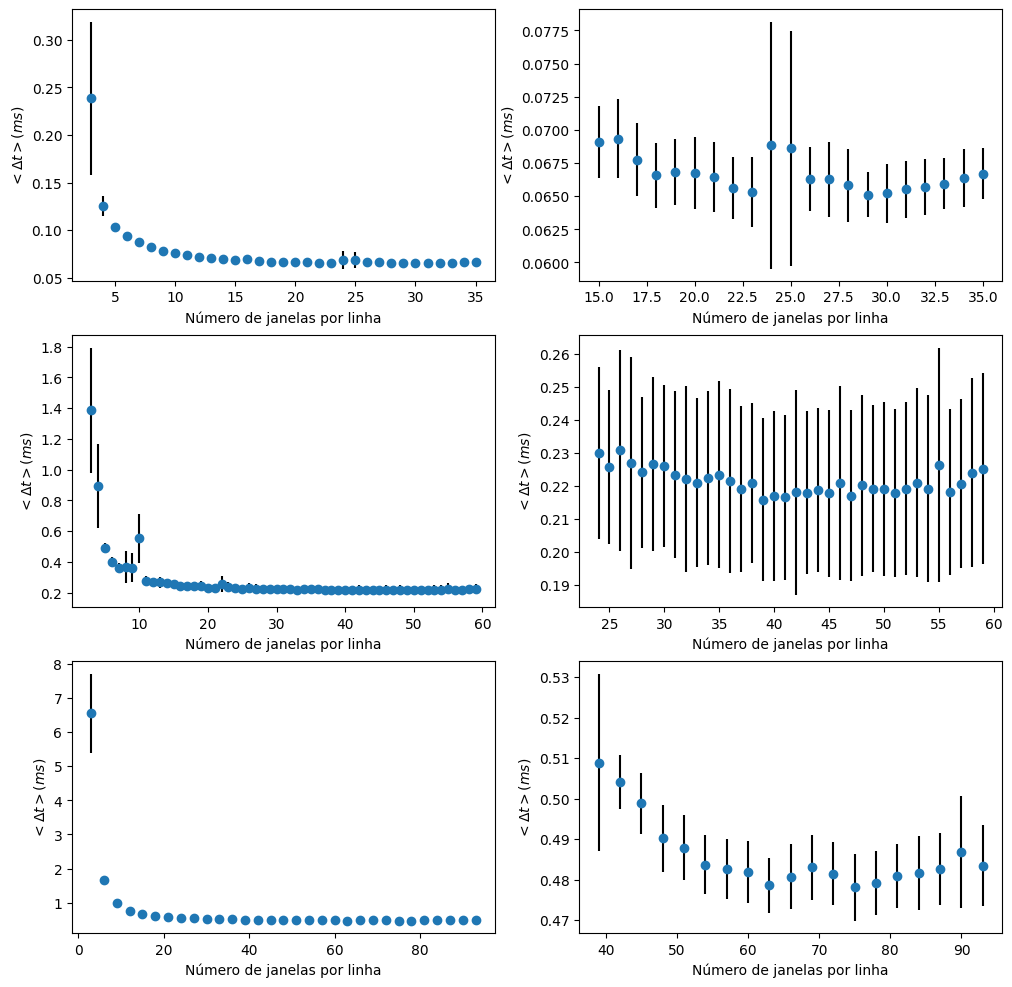

In [22]:
run_to_cut_time = {0: 400, 1: 400, 2: 400}
run_to_cut_windows = {0: 10, 1: 20, 2: 30}

import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (12, 12)

plt.figure()
for run_id in range(3):
    mean = []
    std = []
    time_cut = run_to_cut_time[run_id]
    for id, num in enumerate(num_windows[run_id]):
        mean.append(data[run_id][id][time_cut:].mean())
        std.append(data[run_id][id][time_cut:].std())
        # plt.plot(data[id], label=num)
    mean = np.array(mean)
    std = np.array(std)


    num_windows_i = num_windows[run_id]
    num_windows_norm = num_windows[run_id]/num_windows[run_id].max() 
    
    filter = num_windows_i > num_windows_i.max()*0.4
    # filter = num_windows_norm > 0.4

    # plt.figure()
    plt.subplot(3, 2, 2 * run_id + 1)
    
    plt.xlabel("Número de janelas por linha")
    plt.ylabel("$<\Delta t> (ms)$")
    plt.errorbar(num_windows_i, mean, std, fmt="o", ecolor="black")
    
    plt.subplot(3, 2, 2 * run_id + 2)
    plt.xlabel("Número de janelas por linha")
    plt.ylabel("$<\Delta t> (ms)$")
    plt.errorbar(num_windows_i[filter], mean[filter], std[filter], fmt="o", ecolor="black")
    

plt.show()

In [6]:
print(f"1: {25/35}")
print(f"2: {45/59}")
print(f"3: {70/94}")

1: 0.7142857142857143
2: 0.7627118644067796
3: 0.7446808510638298
